In [ ]:
from transpile_benchy.interface import QASMBench, RedQueen
from transpile_benchy.interface import MQTBench

mqt = MQTBench(num_qubits=4, filter_str="hhl")
qasm_bench_s = QASMBench(size="small")
qasm_bench_m = QASMBench(size="medium")
# redqueen = RedQueen()

from transpile_benchy.metrics import DepthMetric

depth_metric = DepthMetric()

from qiskit.transpiler import CouplingMap

# coupling_map = CouplingMap.from_grid(6, 6)
coupling_map = CouplingMap.from_grid(4, 4)
# coupling_map = CouplingMap.from_heavy_hex(5)

from virtual_swap.pass_managers import SabreVS, SabreQiskit  # , QiskitLevel3

In [25]:
from transpile_benchy.interface import QiskitFunctionInterface
from qiskit.circuit.library import TwoLocal

entanglement_types = ["linear", "full", "circular", "sca"]
entanglement_types = ["full", "reverse_linear"]


def function_generator(entanglement_type):
    def entanglement_function(n_qubits):
        return TwoLocal(n_qubits, ["ry"], "cx", entanglement_type, reps=1)

    entanglement_function.__name__ = f"TwoLocal_{entanglement_type}"
    return entanglement_function


num_qubits_options = [4, 8]

qiskit_functions_twolocal = [
    QiskitFunctionInterface(function_generator(entanglement_type), num_qubits_options)
    for entanglement_type in entanglement_types
]

In [26]:
# 5Q backend = provider.backend.ibmq_quito
# 20Q backend = provider.backend.ibmq_mumbai
from typing import Callable, List
from transpile_benchy.interface import QiskitFunctionInterface

num_qubits = [4, 8, 12, 16]  # , 20, 24, 28, 32, 36]
from qiskit.circuit.library import QFT, QuantumVolume

qiskit_functions_qft = QiskitFunctionInterface(QFT, num_qubits)
qiskit_functions_qv = QiskitFunctionInterface(QuantumVolume, num_qubits)

In [36]:
import logging
from transpile_benchy.benchmark import Benchmark

# Create a specific logger for transpile_benchy and set its level to DEBUG
transpile_benchy_logger = logging.getLogger("transpile_benchy")
transpile_benchy_logger.setLevel(logging.DEBUG)
# transpile_benchy_logger.setLevel(logging.INFO)

# Silence the qiskit logger by setting its level to WARNING or higher
qiskit_logger = logging.getLogger("qiskit")
qiskit_logger.setLevel(logging.WARNING)

benchmark = Benchmark(
    transpilers=[
        SabreQiskit(coupling_map),  # , csx_basis=True),
        SabreVS(coupling_map, logger=transpile_benchy_logger)  # , cx_basis=True),
        # QiskitLevel3(coupling_map),
    ],
    # submodules=qiskit_functions_twolocal,
    # submodules=[qasm_bench_m],
    # submodules=[qiskit_functions_qv],
    # submodules=[mqt],
    submodules=[
        MQTBench(num_qubits=4, filter_str="qaoa"),
        MQTBench(num_qubits=8, filter_str="qaoa"),
        MQTBench(num_qubits=12, filter_str="qaoa"),
        MQTBench(num_qubits=16, filter_str="qaoa"),
    ],
    metrics=[depth_metric],
    logger=transpile_benchy_logger,
    num_runs=3,  # 5
)
benchmark.run()

INFO:transpile_benchy:Running benchmarks for circuits...
Running circuits for MQTBench:   0%|          | 0/28 [00:00<?, ?it/s]DEBUG:transpile_benchy:Running benchmark for circuit portfolioqaoa
DEBUG:transpile_benchy:Running transpiler SabreQiskit on circuit portfolioqaoa
DEBUG:transpile_benchy:Calculating Depth for circuit portfolioqaoa
INFO:transpile_benchy:Transpiler SabreQiskit, Depth: 54
DEBUG:transpile_benchy:Running transpiler SabreQiskit on circuit portfolioqaoa
DEBUG:transpile_benchy:Calculating Depth for circuit portfolioqaoa
INFO:transpile_benchy:Transpiler SabreQiskit, Depth: 40
DEBUG:transpile_benchy:Running transpiler SabreQiskit on circuit portfolioqaoa
DEBUG:transpile_benchy:Calculating Depth for circuit portfolioqaoa
INFO:transpile_benchy:Transpiler SabreQiskit, Depth: 52
DEBUG:transpile_benchy:Running transpiler SabreVS on circuit portfolioqaoa
Running circuits for MQTBench:   0%|          | 0/28 [00:06<?, ?it/s]


KeyError: 'swap'

In [ ]:
benchmark.plot()

### Below used for debugging indivudal circuit runs


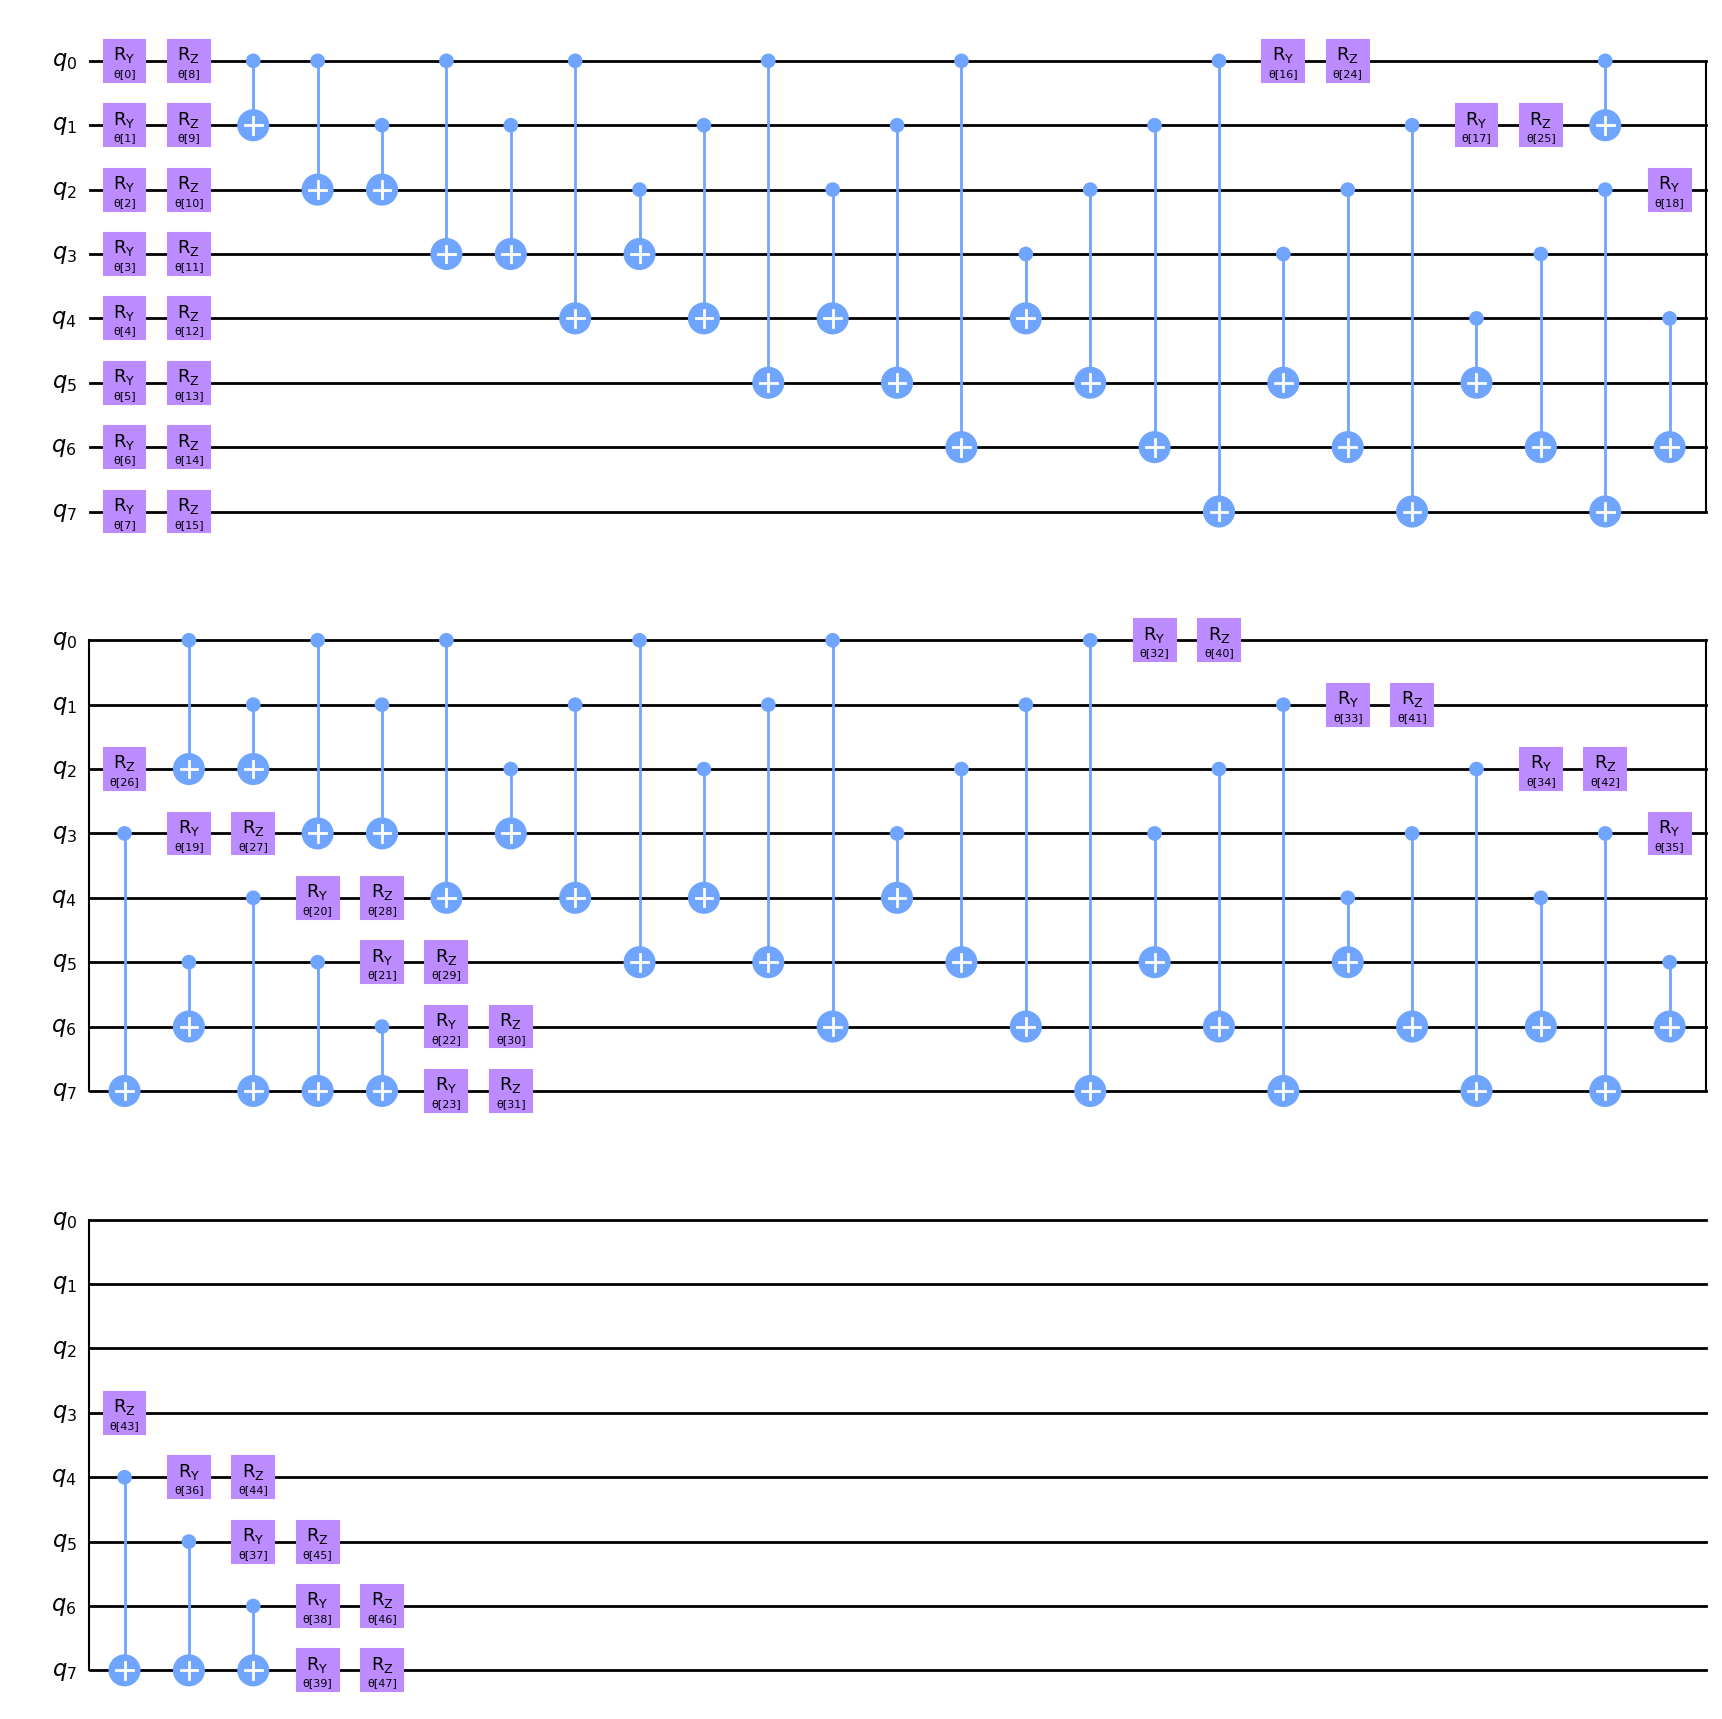

In [4]:
from qiskit.circuit.library import QuantumVolume, EfficientSU2, TwoLocal, QFT
from qiskit import QuantumCircuit

qc = EfficientSU2(8, entanglement="full", reps=2)
# qc = QFT(8)
# from qiskit import QuantumCircuit
# qc = QuantumCircuit(3)
# qc.ccx(0,1,2)
qc.decompose().draw("mpl")

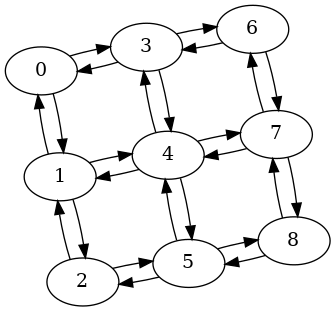

In [5]:
from qiskit.providers.fake_provider import FakeQuitoV2
from qiskit.transpiler.coupling import CouplingMap

coupling_map = FakeQuitoV2().target.build_coupling_map()
# coupling_map = CouplingMap.from_line(4)
coupling_map = CouplingMap.from_grid(3, 3)
coupling_map.draw()

In [6]:
# from qiskit.circuit.library import QFT

# # coupling_map = CouplingMap.from_line(5)
# coupling_map = CouplingMap.from_grid(5, 6)
# # qc = QFT(8)
# # qc = QuantumCircuit(8)
# # qc.h(0)
# # qc.cx(0, 1)
# # qc.cx(1, 2)
# # qc.cx(2, 3)
# # # qc.cx(3, 4)
# # qc.cx(4, 5)
# # qc.cx(5, 6)
# # qc.cx(6, 7)
# qc.decompose().draw(output="mpl")

In [7]:
from virtual_swap.pass_managers import SabreVS, SabreQiskit
from transpile_benchy.metrics import DepthMetric

for _ in range(5):
    runner = SabreVS(coupling_map)  # , cx_basis=True)
    transp = runner.run(qc)
    # mid0 = runner.pm.property_set["mid0"]
    mid = runner.pm.property_set["circuit_progress"]
    print(DepthMetric.calculate(transp))
# mid.draw(output="mpl", fold=-1)#, filename="qft_vs.svg")
# transp.draw(output="mpl")

94
78
73
68
82


In [8]:
# runner.pm.property_set["layout"]

119
115
119
119
120


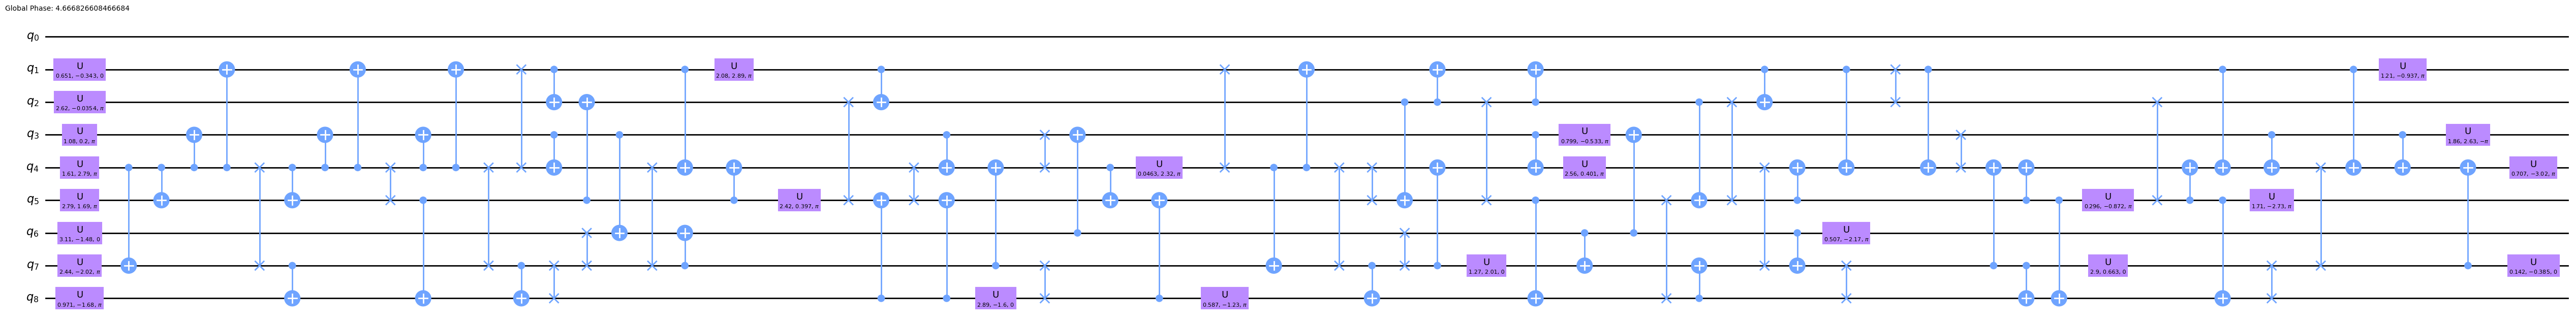

In [12]:
# set original qc to use
from qiskit import transpile

# qc2 = transpile(qc, initial_layout=runner.pm.property_set["layout"], coupling_map=coupling_map)
# qc2 = transpile(qc, coupling_map=coupling_map, optimization_level=3)
for _ in range(5):
    pm2 = SabreQiskit(coupling_map)  # , cx_basis=True)
    qc2 = pm2.run(qc)
    mid = pm2.pm.property_set["circuit_progress"]
    print(DepthMetric.calculate(qc2))
mid.draw(output="mpl", fold=-1)  # , filename="qft_qiskit.svg")

In [10]:
# qc2.draw(output="mpl")

In [11]:
# from qiskit.quantum_info import Operator
# Operator(mid).equiv(qc2)